In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [40]:

dataset = pd.read_csv('bank-full.csv')


In [41]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [24]:
print ('Number of samples: ',len(df))

Number of samples:  45211


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Dealing with missing values. The values labelled "unknown" could be treated as a class label itself

In [5]:
var_categorical = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", 
                  "poutcome"]
var_numerical = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx",
                "euribor3m", "nr.employed"]
print(len(var_categorical), len(var_numerical))

10 10


# Missing Values

In [6]:
dataset.replace('unknown', np.NaN, inplace=True)

In [7]:
dataset.isnull().sum()/len(dataset)*100

age           0.000000
job           0.637013
marital       0.000000
education     4.107407
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      28.798301
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome     81.747805
Target        0.000000
dtype: float64

In [8]:
# Number of distinct values in dataset variables
for i, column in enumerate(dataset.columns):
    print("{}. ".format(i) + str(column.title()) + ": {}". format(dataset[column].nunique()))

0. Age: 77
1. Job: 11
2. Marital: 3
3. Education: 3
4. Default: 2
5. Balance: 7168
6. Housing: 2
7. Loan: 2
8. Contact: 2
9. Day: 31
10. Month: 12
11. Duration: 1573
12. Campaign: 48
13. Pdays: 559
14. Previous: 41
15. Poutcome: 3
16. Target: 2


In [9]:
# Function to label the count on top of each bar in graph
def label_values(ax, spacing=5):
    total = 0
    for rect in ax.patches:
        total += rect.get_height()

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'
        
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.2f}, {:.2f}".format(y_value, y_value/total*100)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)   

Exploratory data analysis

i. Univariate analysis and segmented univariate analysis

a. Categorical variables

Job


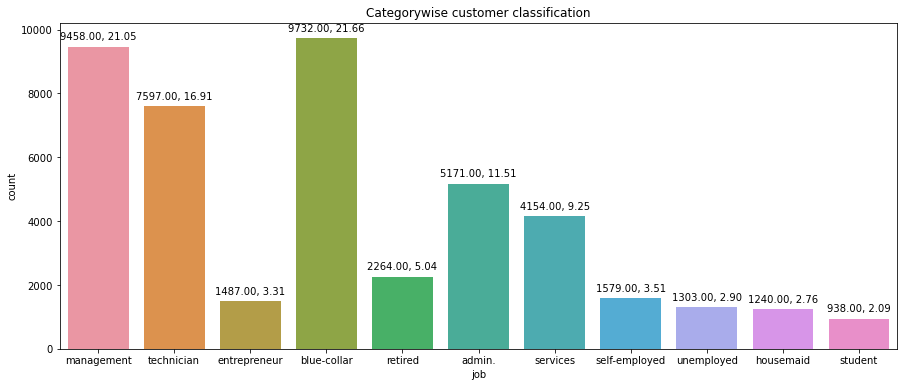

Marital


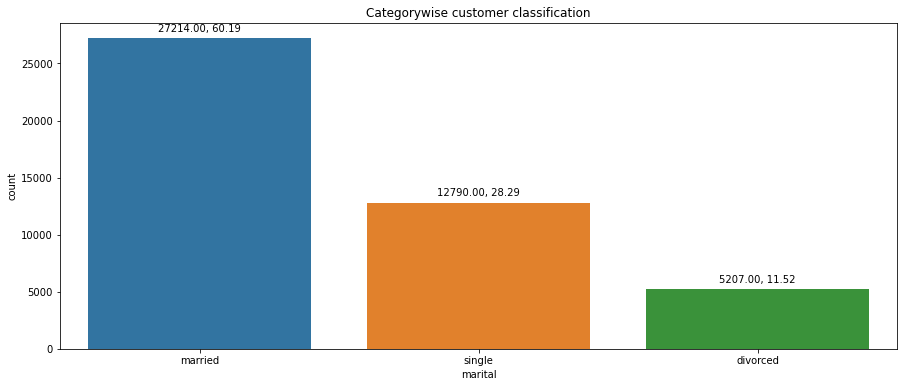

Education


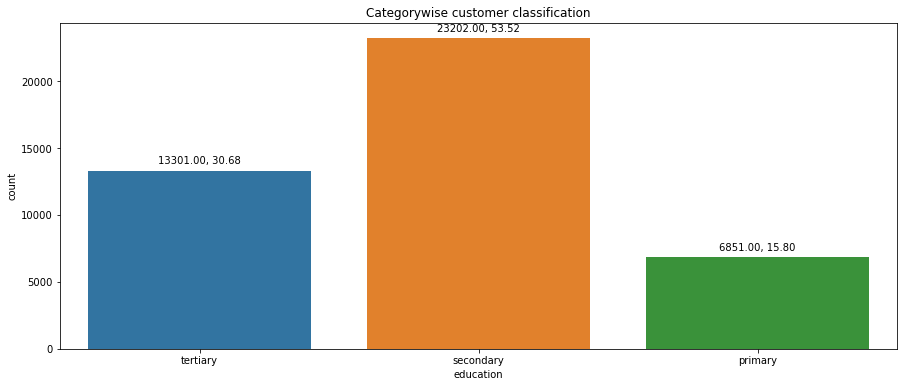

Default


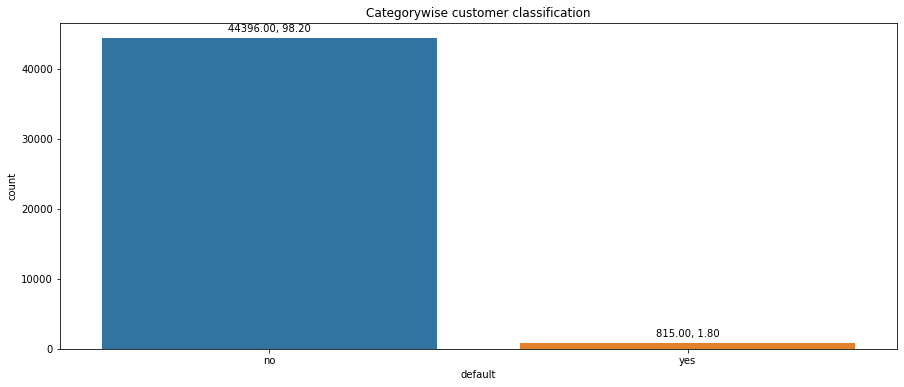

Housing


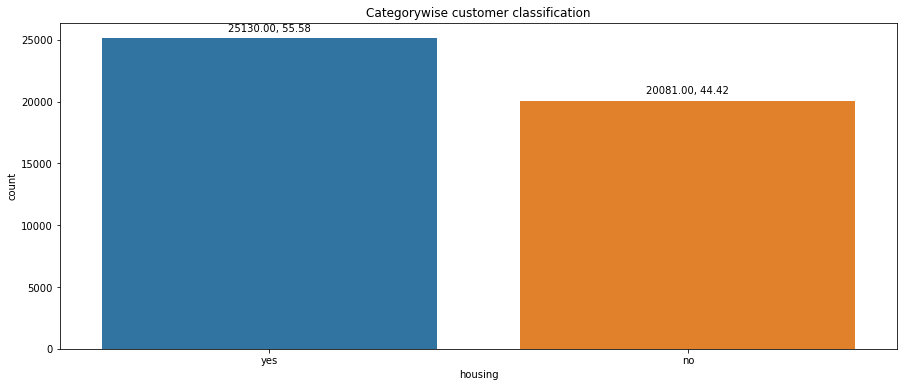

Loan


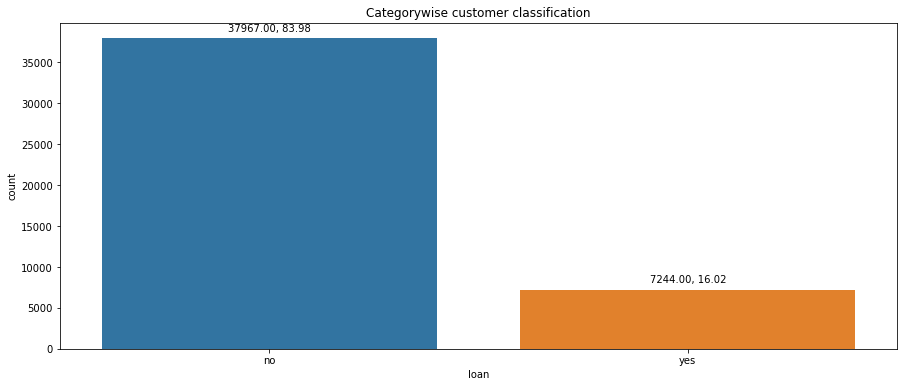

Contact


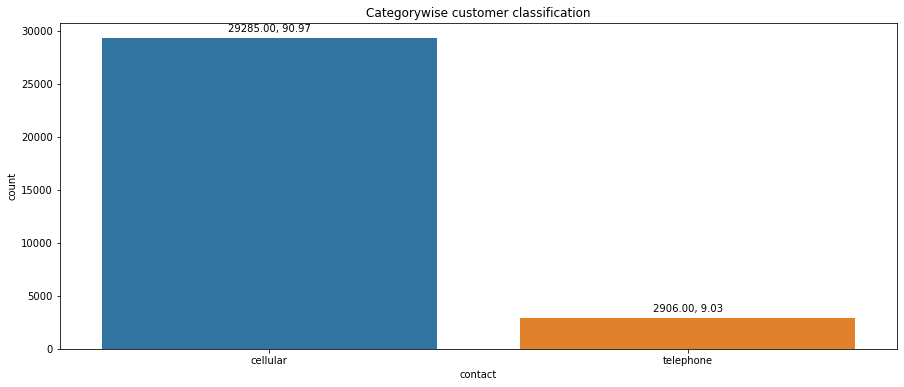

Month


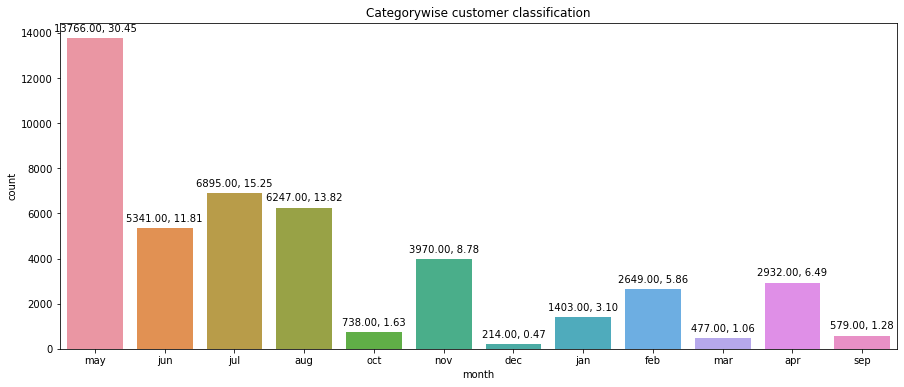

Day_Of_Week


KeyError: 'day_of_week'

<Figure size 1080x432 with 0 Axes>

In [23]:
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = dataset[column])
    label_values(ax)
    plt.title('Categorywise customer classification')
    plt.show()

In [43]:
# Default variable has no impact on the client subscribing for term deposit.
dataset.drop(["default"], axis = 1, inplace=True)

In [29]:
var_categorical = list(set(var_categorical) - set(['default']))

In [44]:
dataset.dropna(inplace=True)

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   contact    45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  Target     45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [46]:
#### Drop the duration (as Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.)
duration = dataset["duration"]
dataset.drop(["duration"], axis = 1, inplace=True)

In [33]:
var_numerical = list(set(var_numerical) - set(['duration']))

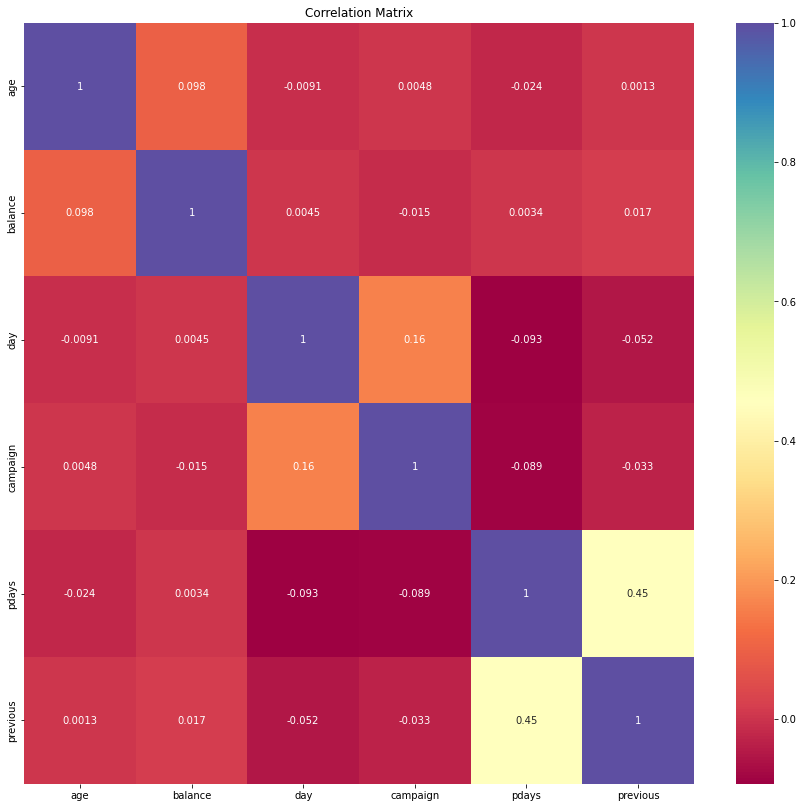

In [34]:
plt.figure(figsize=(15, 14))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.title('Correlation Matrix')
plt.show()

In [50]:
print(dataset["campaign"].quantile(0.05), len(dataset[dataset["campaign"]<dataset["campaign"].quantile(0.05)] ))
print(dataset["campaign"].quantile(0.95), len(dataset[dataset["campaign"]>dataset["campaign"].quantile(0.95)] ))

1.0 0
8.0 1789


In [56]:
dataset[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,45211.000000,45211.000000,45211.000000
mean,40.197828,2.763841,0.580323
std,100.128746,3.098021,2.303441
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,-1.000000,3.000000,0.000000
max,871.000000,63.000000,275.000000


In [57]:
len (dataset[dataset['pdays'] > 400] ) / len(dataset) * 100

0.5175731569750724

In [58]:
len (dataset[dataset['campaign'] > 34] ) / len(dataset) * 100

0.059719979650969895

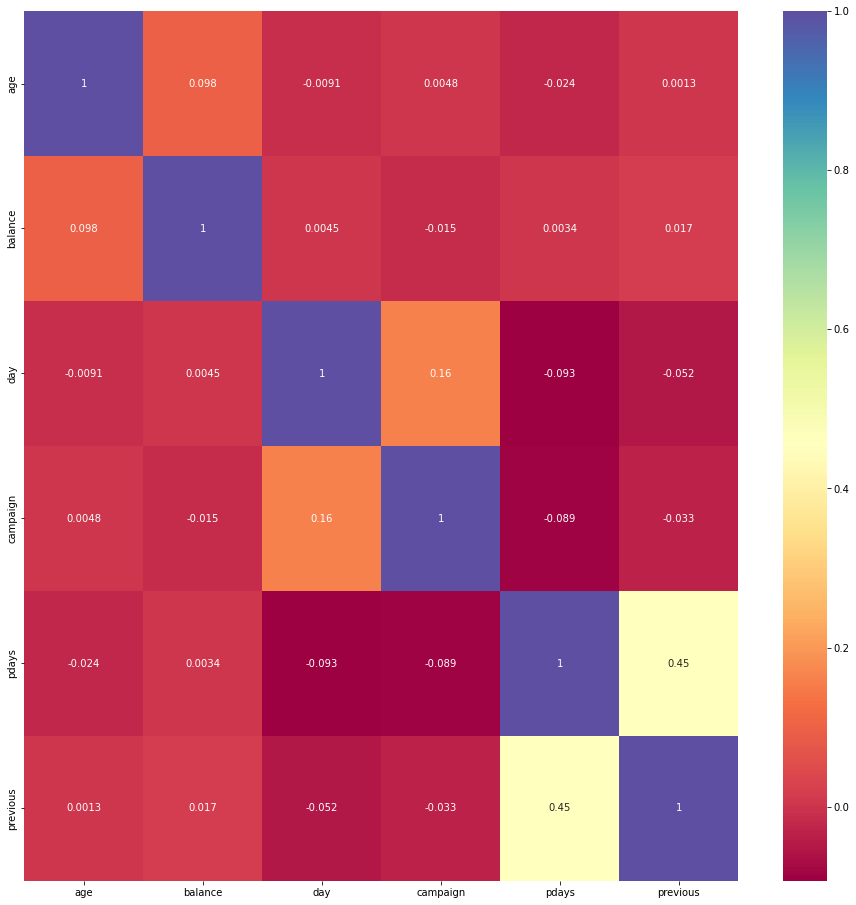

In [61]:
plt.figure(figsize=(16, 16))
sns.heatmap(dataset.corr(), annot=True, cmap='Spectral')
plt.show()

In [64]:
dataset.corr()

,age,balance,day,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,0.162490,-0.093044,-0.051710
campaign,0.004760,-0.014578,0.162490,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,-0.032855,0.454820,1.000000


In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   contact    45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  Target     45211 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
# We will divide the training and testing set in 70% and 30% respectively
# We used random_state = 100 so that everytime we run it we will have same set of training and testing set
dataset_train, dataset_test = train_test_split(dataset, train_size = 0.7, random_state = 100)

In [70]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [71]:
scaler = MinMaxScaler()

In [ ]:
# Fit and Transform the data
# Fit will calculate our Min and Max values
# Transform will operate on standardisation function and scales our values
dataset_train[var_numerical] = scaler.fit_transform(dataset_train[var_numerical])

In [ ]:
# Transform will operate on standardisation function and scales our values
dataset_test[var_numerical] = scaler.transform(dataset_test[var_numerical])

In [73]:
dataset_train.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
18391,40,blue-collar,married,secondary,4853,no,no,cellular,31,jul,2,-1,0,unknown,no
13056,26,admin.,single,secondary,-378,no,yes,cellular,8,jul,1,-1,0,unknown,no
13415,52,technician,married,tertiary,3440,yes,no,cellular,9,jul,1,-1,0,unknown,no
21022,39,management,single,tertiary,668,no,no,cellular,14,aug,2,-1,0,unknown,no
24510,50,management,married,tertiary,830,no,no,cellular,17,nov,1,138,2,failure,no


In [74]:
dataset_test.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
14789,45,blue-collar,single,secondary,0,no,yes,cellular,16,jul,2,-1,0,unknown,no
8968,41,management,married,tertiary,5,no,no,unknown,5,jun,1,-1,0,unknown,no
34685,40,management,single,secondary,906,yes,no,cellular,5,may,4,-1,0,unknown,no
2369,25,admin.,single,secondary,768,yes,no,unknown,13,may,1,-1,0,unknown,no
36561,37,services,married,primary,0,yes,no,cellular,12,may,1,344,1,success,no


In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   contact    45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  Target     45211 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [79]:
# Draw ROC curve from training and test data probability
def draw_roc( train_actual, train_probs, test_actual, test_probs ):
    train_fpr, train_tpr, train_thresholds = metrics.roc_curve( train_actual, train_probs,
                                              drop_intermediate = False )
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve( test_actual, test_probs,
                                              drop_intermediate = False )
    train_auc_score = metrics.roc_auc_score( train_actual, train_probs )
    test_auc_score = metrics.roc_auc_score( test_actual, test_probs )
    plt.figure(figsize=(5, 5))
    plt.plot( train_fpr, train_tpr, label='ROC curve (area = %0.3f)' % train_auc_score )
    plt.plot( test_fpr, test_tpr, label='ROC curve (area = %0.3f)' % test_auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


In [80]:
# Train model using hyperparmeter tuning
def training_model_hyperparameter(model, scoring, params_grid, X_train, y_train):
    folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state=100)

    grid = GridSearchCV(estimator = model, scoring=scoring, param_grid = params_grid, cv = folds, 
                           verbose=0, return_train_score=True, n_jobs=3)
    grid.fit(X_train, y_train)
    return grid